### Wikipedia (using the URL)

Data is received from the API from the URL

In [1]:
%%capture
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
print(check_output("dir .", shell=True).decode("utf8"))

Wikipedia module documentation: https://wikipedia.readthedocs.io/en/latest/code.html#module-wikipedia

In [ ]:
# Usage of the API using the URL

import requests
import re

def get_wikipedia_summary(topic):
    url = f"https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": topic,
        "prop": "extracts",
        "exintro": True,
        "explaintext": True,
    }
    response = requests.get(url, params=params)
    data = response.json()
    page = next(iter(data['query']['pages'].values()))
    final = page.get('extract', 'No summary available.')
    return final

# Example
print(get_wikipedia_summary("FIFA"))


The Fédération Internationale de Football Association (lit. 'International Federation of Association Football'), more commonly known by its acronym FIFA ( FEE-fə), is the international self-regulatory governing body of association football, beach soccer, and futsal. It was founded on 21 May 1904 to oversee international competition among the national associations of Belgium, Denmark, France, Germany, the Netherlands, Spain (represented by Real Madrid CF), Sweden, and Switzerland. Headquartered in Zurich, Switzerland, its membership now comprises 211 national associations. These national associations must also be members of one of the six regional confederations: CAF (Africa), AFC (Asia), UEFA (Europe), CONCACAF (North & Central America and the Caribbean), OFC (Oceania), and CONMEBOL (South America).
FIFA is a sports governing body that organizes football events all over the world. FIFA outlines several objectives in its organizational statutes, including growing football internationall

In [3]:

url = f"https://en.wikipedia.org/w/api.php"
params = {
    "action": "query",
    "format": "json",
    "titles": "FIFA",
    "prop": "extracts",
    "exintro": True,
    "explaintext": True,
}
response = requests.get(url, params=params)
data = response.json()
page = next(iter(data['query']['pages'].values()))
final = page.get('extract', 'No summary available.')

print (f"\n The response result is: \n\n {response}")
print (f"\n The data result is: \n\n {data}")
print (f"\n The page result is: \n\n {page}")
#print (f"\n The final result is: \n\n {final}")

# Print only the first 2 paragraphs of the extract
lines = final.split('\n')
print("\nThe first  2 paragraphs of the summary are:\n")
for line in lines[:2]:
    print(line)
    
# Split the extract into sentences using regex
sentences = re.split(r'(?<=[.!?]) +', final)

# Print the first 4 sentences
print("\nThe first 4 sentences of the summary are:\n")
for sentence in sentences[:4]:
    print(sentence)
    
# Count and print the number of sentences
num_sentences = len([s for s in sentences if s.strip()])  # ignore empty ones
print(f"\nTotal number of sentences in the extract: {num_sentences}")




 The response result is: 

 <Response [200]>

 The data result is: 

 {'batchcomplete': '', 'query': {'pages': {'11049': {'pageid': 11049, 'ns': 0, 'title': 'FIFA', 'extract': "The Fédération Internationale de Football Association (lit.\u2009'International Federation of Association Football'), more commonly known by its acronym FIFA ( FEE-fə), is the international self-regulatory governing body of association football, beach soccer, and futsal. It was founded on 21 May 1904 to oversee international competition among the national associations of Belgium, Denmark, France, Germany, the Netherlands, Spain (represented by Real Madrid CF), Sweden, and Switzerland. Headquartered in Zurich, Switzerland, its membership now comprises 211 national associations. These national associations must also be members of one of the six regional confederations: CAF (Africa), AFC (Asia), UEFA (Europe), CONCACAF (North & Central America and the Caribbean), OFC (Oceania), and CONMEBOL (South America).\nFIFA 

### Wikipedia (using the 'wikipedia' module)

Data is received from the API from the 'wikipedia' module in Python

In [4]:
# Usage of the API using the module in Python

import wikipedia

# Set language to English (optional)
wikipedia.set_lang("en")

# Fetch the content of the Wikipedia page
page_title = "FIFA"

sres = wikipedia.search("FIFA")

print (sres[2])


summary = wikipedia.page(sres[2]).summary

print (summary)

FIFA World Cup
The FIFA World Cup, often called the World Cup, is an international association football competition among the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The tournament has been held every four years since the inaugural tournament in 1930, with the exception of 1942 and 1946 due to the Second World War. The reigning champions are Argentina, who won their third title at the 2022 World Cup by defeating France.
The contest starts with the qualification phase, which takes place over the preceding three years to determine which teams qualify for the tournament phase. In the tournament phase, 32 teams compete for the title at venues within the host nation(s) over the course of about a month. The host nation(s) automatically qualify for the group stage of the tournament. The competition is scheduled to expand to 48 teams, starting with the 2026 World Cup.
As of the 2022 World Cup

### Weather

Data is received from API using the URL

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.47, 'feels_like': 28.6, 'temp_min': 27.62, 'temp_max': 29.95, 'pressure': 1024, 'humidity': 46, 'sea_level': 1024, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1755263426, 'sys': {'type': 2, 'id': 268730, 'country': 'GB', 'sunrise': 1755233173, 'sunset': 1755285839}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}

📋 WEATHER SUMMARY

+----------------------+---------------------+
|        Metric        |        Value        |
+----------------------+---------------------+
|         City         |       Killeen       |
|       Country        |         US          |
|       Weather        | Clouds (Few clouds) |
|   Temperature (°C)   |        26.72        |
|   Feels Like (°C)    |        29.53        |
| Min Temperature (°C) |        25.55      

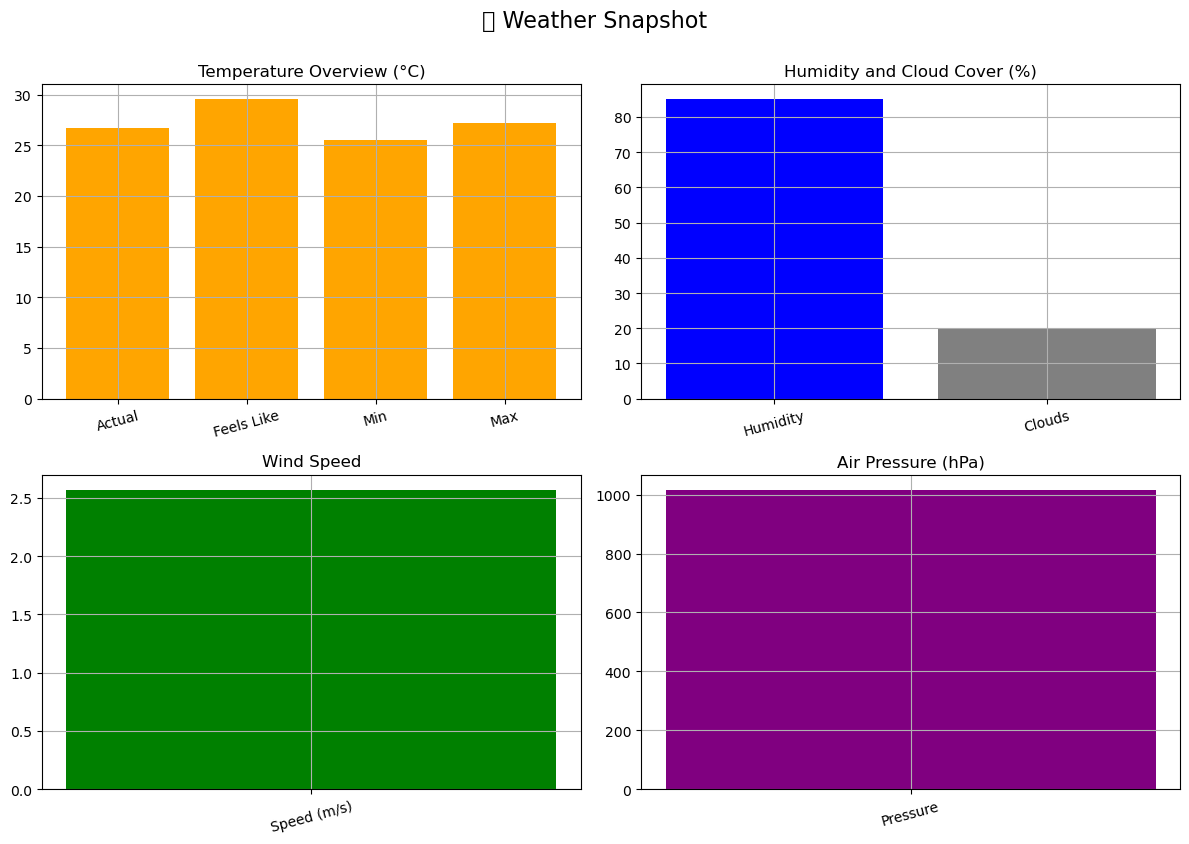

In [ ]:
import requests

def get_weather(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city,
        "appid": api_key,
        "units": "metric",
    }
    response = requests.get(url, params=params)
    return response.json()

# Example usage
api_key = "a0559d8b09966c943d02bb3434a4bf42"
weather_data = get_weather("London", api_key)
print(weather_data)




import requests
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from datetime import datetime

def get_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city,
        "appid": api_key,
        "units": "metric",
    }
    response = requests.get(url, params=params)
    return response.json()

def kelvin_to_celsius(k):
    return round(k - 273.15, 2)

def unix_to_time(ts, timezone_offset):
    return datetime.utcfromtimestamp(ts + timezone_offset).strftime('%H:%M:%S')

def analyze_weather(data):
    # Extract fields
    city = data['name']
    country = data['sys']['country']
    weather_main = data['weather'][0]['main']
    description = data['weather'][0]['description'].capitalize()
    icon_code = data['weather'][0]['icon']
    temp = data['main']['temp']
    feels_like = data['main']['feels_like']
    temp_min = data['main']['temp_min']
    temp_max = data['main']['temp_max']
    humidity = data['main']['humidity']
    pressure = data['main']['pressure']
    visibility_km = data['visibility'] / 1000
    wind_speed = data['wind']['speed']
    wind_deg = data['wind']['deg']
    gust = data['wind'].get('gust', 'N/A')
    cloud_coverage = data['clouds']['all']
    sunrise = unix_to_time(data['sys']['sunrise'], data['timezone'])
    sunset = unix_to_time(data['sys']['sunset'], data['timezone'])

    # Build data for table
    info = [
        ["City", city],
        ["Country", country],
        ["Weather", f"{weather_main} ({description})"],
        ["Temperature (°C)", temp],
        ["Feels Like (°C)", feels_like],
        ["Min Temperature (°C)", temp_min],
        ["Max Temperature (°C)", temp_max],
        ["Humidity (%)", humidity],
        ["Pressure (hPa)", pressure],
        ["Visibility (km)", visibility_km],
        ["Wind Speed (m/s)", wind_speed],
        ["Wind Direction (°)", wind_deg],
        ["Wind Gust (m/s)", gust],
        ["Cloud Coverage (%)", cloud_coverage],
        ["Sunrise", sunrise],
        ["Sunset", sunset]
    ]

    print("\n WEATHER SUMMARY\n")
    print(tabulate(info, headers=["Metric", "Value"], tablefmt="pretty"))

    # Plot graphs
    plot_weather_summary(temp, feels_like, temp_min, temp_max, humidity, pressure, wind_speed, cloud_coverage)

def plot_weather_summary(temp, feels_like, temp_min, temp_max, humidity, pressure, wind_speed, cloud_coverage):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()

    # 1. Temperature bar
    axs[0].bar(["Actual", "Feels Like", "Min", "Max"], [temp, feels_like, temp_min, temp_max], color="orange")
    axs[0].set_title("Temperature Overview (°C)")

    # 2. Humidity & Cloud
    axs[1].bar(["Humidity", "Clouds"], [humidity, cloud_coverage], color=["blue", "gray"])
    axs[1].set_title("Humidity and Cloud Cover (%)")

    # 3. Wind Info
    axs[2].bar(["Speed (m/s)"], [wind_speed], color="green")
    axs[2].set_title("Wind Speed")

    # 4. Pressure
    axs[3].bar(["Pressure"], [pressure], color="purple")
    axs[3].set_title("Air Pressure (hPa)")

    for ax in axs:
        ax.grid(True)
        for label in ax.get_xticklabels():
            label.set_rotation(15)

    plt.tight_layout()
    plt.suptitle("Weather Snapshot", fontsize=16, y=1.05)
    plt.show()


# === Example usage ===
# api_key = "your_openweathermap_api_key"  # replace with real API key
weather_data = get_weather("Killeen", api_key)
analyze_weather(weather_data)



### NASA picture of the day

Data is received from API URL of NASA

In [6]:
import requests

def get_apod(api_key):
    url = f"https://api.nasa.gov/planetary/apod"
    params = {
        "api_key": api_key,
    }
    response = requests.get(url, params=params)
    return response.json()

# Example usage
api_key = "DEMO_KEY"
apod_data = get_apod(api_key)
print(apod_data)


{'copyright': 'Jeff Dai', 'date': '2025-08-15', 'explanation': 'In the predawn sky on August 13, two planets were close. And despite the glare of a waning gibbous Moon, bright Jupiter and even brighter Venus were hard to miss. Their brilliant close conjunction is posing above the eastern horizon in this early morning skyscape. The scene was captured in a single exposure from a site near Gansu, China, with light from both planets reflected in the still waters of a local pond. Also seen against the moonlight were flashes from the annual Perseid Meteor Shower, known for its bright, fast meteors. Near the much anticipated peak of activity, the shower meteors briefly combined with the two planets for a celestial spectacle even in moonlit skies.', 'hdurl': 'https://apod.nasa.gov/apod/image/2508/IMG_20250813_202125_2048.jpg', 'media_type': 'image', 'service_version': 'v1', 'title': 'Moonlight, Planets, and Perseids', 'url': 'https://apod.nasa.gov/apod/image/2508/IMG_20250813_202125v1.jpg'}


In [ ]:
# Show the image(s) from above

from IPython.display import Image, display

image_url = apod_data['hdurl'] #'https://apod.nasa.gov/apod/image/2504/PIA21983JupiterLundh.jpg' 
display(Image(url=image_url))


In [8]:
# Another example from NASA images. Mars Rover image

import requests
from PIL import Image
from io import BytesIO

def fetch_mars_rover_photos(api_key, sol=1500, camera="NAVCAM"):
    url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
    params = {"api_key": api_key, "sol": sol, "camera": camera}
    response = requests.get(url, params=params)
    data = response.json()
    
    if data["photos"]:
        photo = data["photos"][0]
        img_url = photo["img_src"]
        print(f"Photo taken by: {photo['rover']['name']} on {photo['earth_date']}")
        print(f"Camera: {photo['camera']['full_name']}")
        print(f"Image URL: {img_url}")
        img_response = requests.get(img_url)
        img = Image.open(BytesIO(img_response.content))
        img.show()
    else:
        print("No photos available for this query.")

# Example usage
fetch_mars_rover_photos("DEMO_KEY")


Photo taken by: Curiosity on 2016-10-25
Camera: Navigation Camera
Image URL: http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01500/opgs/edr/ncam/NLB_530661097EDR_F0582394NCAM07753M_.JPG


### Github

Data is received from API URL or ....

In [10]:
import requests

def get_repo_info(owner, repo):
    url = f"https://api.github.com/repos/{owner}/{repo}"
    response = requests.get(url)
    return response.json()

# Example usage
repo_info = get_repo_info("octocat", "Hello-World")
print(repo_info)


{'id': 1296269, 'node_id': 'MDEwOlJlcG9zaXRvcnkxMjk2MjY5', 'name': 'Hello-World', 'full_name': 'octocat/Hello-World', 'private': False, 'owner': {'login': 'octocat', 'id': 583231, 'node_id': 'MDQ6VXNlcjU4MzIzMQ==', 'avatar_url': 'https://avatars.githubusercontent.com/u/583231?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/octocat', 'html_url': 'https://github.com/octocat', 'followers_url': 'https://api.github.com/users/octocat/followers', 'following_url': 'https://api.github.com/users/octocat/following{/other_user}', 'gists_url': 'https://api.github.com/users/octocat/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/octocat/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/octocat/subscriptions', 'organizations_url': 'https://api.github.com/users/octocat/orgs', 'repos_url': 'https://api.github.com/users/octocat/repos', 'events_url': 'https://api.github.com/users/octocat/events{/privacy}', 'received_events_url': 'https://api.github.c

### Youtube Video

Data is received from API URL or ....

In [ ]:
# To be continued 